In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
#Listing the default values for the class below
m = 1.2 #mass
fri = 0.5 #friction coefficient
k = 3 #spring constant
t_ini = 0 #initial time
t_fin = 50 #final time
ini_state = ([0, 2]) #initial state

In [3]:
class Slopy:
    
    def __init__(self, omega, m=1, fri=0.25, k=2, t_ini=0, t_fin=50, state0=([-1,2])):
        self.omega = omega
        self.m = m
        self.fri = fri
        self.k = k
        self.ti = t_ini
        self.tf = t_fin
        self.grid = np.linspace(self.ti, self.tf, 1000)
        self.s0 = state0
        
        
    def set_param(self, omega):
        self.omega = omega

    def der_state(self, t, state):
        der = np.zeros_like(state)
        der[0] = state[1]
        der[1] = -(self.fri/self.m)*state[1] - (self.k/self.m)*state[0] + 3*np.sin(self.omega * t)
        return der
    
    def solo(self):
        sol = solve_ivp(self.der_state, (self.ti, self.tf), self.s0, t_eval=self.grid)
        return sol
    
    def ploty(self):
        sol = self.solo()
        plt.xlabel("t")
        plt.ylabel("y")
        plt.title("Damped driven harmonic oscillator")
        plt.plot(sol.t, sol.y[0])
        plt.show()

In [4]:
solver = Slopy(omega=np.sqrt(2))

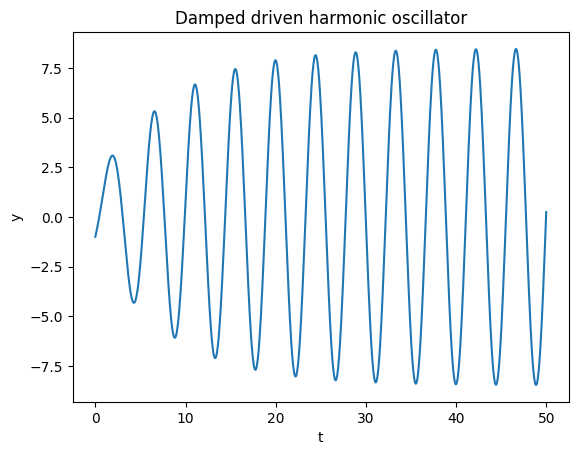

In [5]:
solver.ploty()

In [6]:
solver.set_param(1.5)

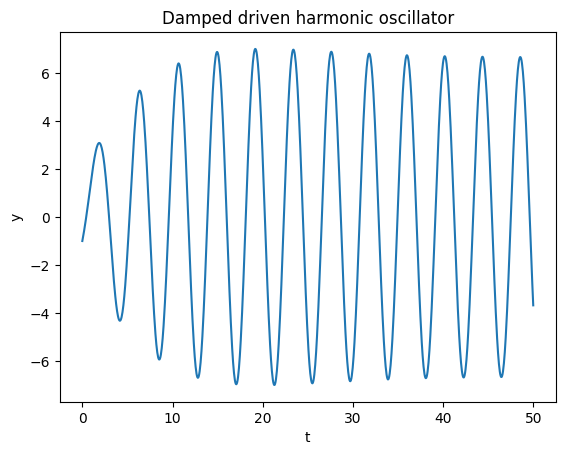

In [7]:
solver.ploty()

In [8]:
solver.set_param(2.5)

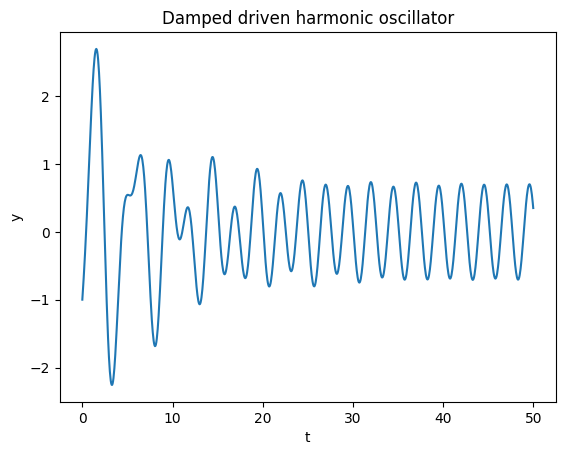

In [9]:
solver.ploty()

Change the code above to solve and plot the IVP y"+0.25y'+2y = 3sin(omega . t); y(0) = 0, y'(0) = 2
For the values of omega in the set {1, 1.2, 1.4, 1.6, 2, 5} plot the displacement as a function of time. Be prepared to point out the resonance in this driven oscillating system. Use the formula from the notes to select a value for omega which will induce a maximal response. Plot the resulting solution.